# Building a simple neural-network with Keras

This is a simple quick-start in performing digit recognition in a neural network in Keras.

## Install prerequisites
On top of Anaconda, you need to install the following packages:
1. `Tensorflow`: conda install -c conda-forge tensorflow 
2. `Keras`: conda install -c conda-forge keras 



## 1. Load training data

We will first implement the training data. We will use the infamous mnist data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.
/Users/denniszhang/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


Let us visualize the data.

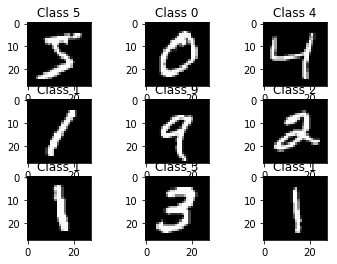

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## 2. Formatting and Pre-processing the data
We need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We will then change the type of the data to `float32`. We'll also scale the inputsby 255 so that all data is between 0 and 1. 

In [5]:
### START YOUR CODE ###
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
### END YOUR CODE ###


print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


The outcome shape for x_train and x_test should be (60000, 784) and (10000, 784)

Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [11]:
### START YOUR CODE ###
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
### END YOUR CODE ###

print("Training label shape", Y_train.shape)
print("Testing label shape", Y_test.shape)

Training label shape (60000, 10)
Testing label shape (10000, 10)


The outcome shape for Y_train and Y_test should be (60000, 10) and (10000, 10)

## 3. Build the neural network
Build the neural-network. Here we'll do a simple 3 layer fully connected network.
<img src="images/figure.png" />

The layers are:
1. ``Input Layer``: 784 nodes
2. ``Hidden Layer 1``: 512 nodes with Activation Layer at `relu`
3. ``Hidden Layer 2``: 512 nodes with Activation Layer at `relu`
4. ``Output Layer 2``: 10 nodes with Activation Layer at `softmax`
5. Between ``Hidden Layer 1``, ``Hidden Layer 2`` and ``Output Layer 2`` add a [Dropout layer](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5) with probability 0.2 to help protect the model from overfitting


In [23]:
model = Sequential()

### START YOUR CODE ###
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.
### END YOUR CODE ###


## 4. Compile the model
Keras is built on top of TensorFlow (and now Theano as well), both packages that allow you to define a deep learning network in Python, which they then compile and run efficiently on the CPU or GPU.

When compiing a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function used here is called *categorical crossentropy*, as we discussed in the lecture.

The optimizer helps determine how quickly the model learns. We won't discuss this in too much detail, but "adam" is often a good choice. [Here is the introduction paper on Adam](https://arxiv.org/abs/1412.6980v8).

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 5. Train the model!
We can now feed the training data loaded in earlier into this model. You should use ``model.fit()`` function from Keras with ``batch_size=128``, `nb_epoch=4`,  and `validation_data` equal to the testing dataset.

In [26]:
### START YOUR CODE ###
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4, verbose=1,
          validation_data=(X_test, Y_test))
### END YOUR CODE ###

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 7s 119us/step - loss: 0.2473 - acc: 0.9247 - val_loss: 0.1063 - val_acc: 0.9667
Epoch 2/4
60000/60000 [==============================] - 7s 114us/step - loss: 0.1006 - acc: 0.9680 - val_loss: 0.0882 - val_acc: 0.9713
Epoch 3/4
60000/60000 [==============================] - 7s 123us/step - loss: 0.0735 - acc: 0.9773 - val_loss: 0.0704 - val_acc: 0.9777
Epoch 4/4
60000/60000 [==============================] - 7s 112us/step - loss: 0.0575 - acc: 0.9814 - val_loss: 0.0619 - val_acc: 0.9809


## 6. Evaluate Performance

In [27]:
score = model.evaluate(X_test, Y_test, verbose=0)
score

[0.06185410053015221, 0.9809]

## 7. Inspecting the output

Let us now inspect the output from the data to make sure it makes sense. 

What you need to do:
1. Get the predicted classes in the variable ``predicted_classes`` for all the test cases.
2. Construct two numerical vectors called ``correct_indices`` and ``incorrect_indices`` which contains the indices of test images that are classified correctly or incorrectly.

In [35]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
### START YOUR CODE ###
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
### END YOUR CODE ###


Your `incorrect_indices` should have a length of 191. The first couple of indices in `incorrect_indices` should be [18, 104, 247, ...]


The following code prints out the image and the predicted value for the first 3 correctly classified images and the first 3 incorrectly classified images. 

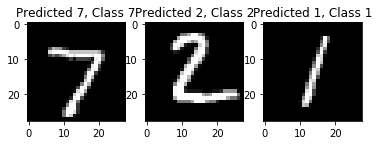

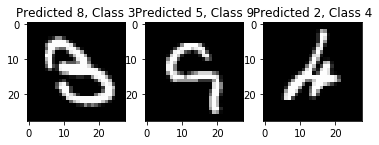

In [36]:
plt.figure()
for i, correct in enumerate(correct_indices[:3]):
    plt.subplot(1,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:3]):
    plt.subplot(1,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))